# Center of the remnant, cumulative mass profiles and bound mass

This Notebook is mainly focused on the first objective proposed in the development of this project. The idea was to generate a criterion that allows us to determine **WHEN** the model can be considered sufficiently relaxed after the collision, based on the behavior of the unbound, bound, and total mass profiles during the time evolution of each simulation.

The first step in order to build the profiles and the bound-unbound criteria is to determine the center of the remnant after the collision. This is a key point that directly affects all the computations and there is not a unique recipe that allows us to identify this particle in the sph star collision simulations. For those reasons we performed a series of tests to choose the right criteria:

In [1]:
# Needed libraries.
from astropy import constants as cons
from astropy import units
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 1000
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import sys

In [2]:
sys.path.append("./Python/")
import Menc_Munb as Men

In [3]:
# Path where the ascii files of the snapshots are located.
data_path = '/home/juanmanuel/Documents/Master/Semester2/Computational/'

In [4]:
# Unit conversion for the gravitational constant.
G = ((cons.G)/((units.R_sun.to(units.m)**3))*(units.M_sun.to(units.kg))*((1.8845e-2*86400)**2)).value

### 1)  The most massive particle as the center of the remnant:

The natural idea to define the central position of a bound system is to use the center of mass. The problem, in this case, is that the StarSmasher sph simulations define the center of the snapshot (the coordinate position *(0,0,0)*) as the cm for all the particles always. So, if we want to track only the center of the remnant we need to think of different alternatives. The first possibility was to define the center as the most massive particle of each snapshot, knowing that the nucleus of the star is located surrounded by the heaviest particles in this type of simulation. 

In [5]:
# This is the function used to apply that idea to all the snapshots
# of all the simulations located in centerba.
def re_center_mass(x,y,z,vx,vy,vz,m):

    index = np.where(m == np.amax(m))[0]
    maxmass = len(index)

    # We implement this condition because there can be many
    # particles with the same maximum mass. If that is the 
    # case only those particles are used to calculate the
    # cm and after that the cm will be the center of the 
    # remnant.
    
    if maxmass == 1:
        xcm = x[np.argmax(m)]
        ycm = y[np.argmax(m)]
        zcm = z[np.argmax(m)]
         
        nw_x = (x-xcm)
        nw_y = (y-ycm)
        nw_z = (z-zcm)
        
        vcmx = vx[np.argmax(m)]
        vcmy = vy[np.argmax(m)]
        vcmz = vz[np.argmax(m)]
        
        nw_vx = (vx-vcmx)
        nw_vy = (vy-vcmy)
        nw_vz = (vz-vcmz)
    
    else:
        xcm = np.sum(x[index]*m[index]) / np.sum(m[index])
        ycm = np.sum(y[index]*m[index]) / np.sum(m[index])
        zcm = np.sum(z[index]*m[index]) / np.sum(m[index])
        
        nw_x = (x-xcm)
        nw_y = (y-ycm)
        nw_z = (z-zcm)
    
        vcmx = np.sum(vx[index]*m[index]) / np.sum(m[index])
        vcmy = np.sum(vy[index]*m[index]) / np.sum(m[index])
        vcmz = np.sum(vz[index]*m[index]) / np.sum(m[index])
        
        nw_vx = (vx-vcmx)
        nw_vy = (vy-vcmy)
        nw_vz = (vz-vcmz)
        
    return nw_x, nw_y, nw_z, nw_vx, nw_vy, nw_vz

After the redefinition of the position and velocity wrt the new center, the particles were reordered from the lower to the higher radius (using the *re_order* function of the **Menc_Munb.py** module) as a faster way to compute the cumulative mass profile. Just after that the bound-unbound criteria based on the energy calculation described in the *(Ballone, 2022)* reference was applied:

$$E = V^{2} + U - \frac{GM_{enc}}{R},$$

where $E \equiv$ total specific energy, $V \equiv$ velocity, $U \equiv$ specific internal energy, $M_{enc} \equiv$ enclose mass until the radius $R$.

If $E > 0$ the particle is unbound and if $E < 0$ the particle is bounded to the remnant (all of this using the *mass_quantities* and *energy* functions of the **Menc_Munb.py** module).

In [6]:
# This are the files generated with the massive particle criteria for all the snapshots of each simulation.

per, out = np.genfromtxt('Data/4Myr/Massive_cm/Munb_percent.txt', usecols= (0,1), unpack=True)
perR, outR = np.genfromtxt('Data/Renzo/Massive_cm/Munb_percent.txt', usecols= (0,1), unpack=True)
perb, outb = np.genfromtxt('Data/b0.1/Massive_cm/Munb_percent.txt', usecols= (0,1), unpack=True)
perb1, outb1 = np.genfromtxt('Data/b1/Massive_cm/Munb_percent.txt', usecols= (0,1), unpack=True)
perv1, outv1 = np.genfromtxt('Data/v100/Massive_cm/Munb_percent.txt', usecols= (0,1), unpack=True)
perv5, outv5 = np.genfromtxt('Data/v500/Massive_cm/Munb_percent.txt', usecols= (0,1), unpack=True)

In [7]:
time = np.linspace(0,0.5*1.8445e-02*len(per),len(per))
timeR = np.linspace(0,0.5*1.8445e-02*len(perR),len(perR))
timeb = np.linspace(0,0.5*1.8445e-02*len(perb),len(perb))
timeb1 = np.linspace(0,0.5*1.8445e-02*len(perb1),len(perb1))
timev1 = np.linspace(0,0.5*1.8445e-02*len(perv1),len(perv1))
timev5 = np.linspace(0,0.5*1.8445e-02*len(perv5),len(perv5))

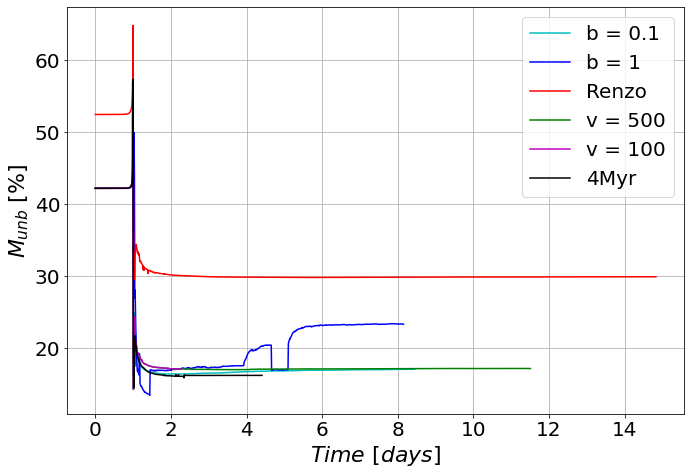

In [8]:
fig = plt.figure(figsize=(10, 7))

plt.plot(timeb,perb,'-c', label = 'b = 0.1')
plt.plot(timeb1,perb1,'-b', label = 'b = 1')
plt.plot(timeR,perR,'-r', label = 'Renzo')
plt.plot(timev5[:-1],perv5[:-1],'-g', label = 'v = 500')
plt.plot(timev1[:-1],perv1[:-1],'-m', label = 'v = 100')
plt.plot(time,per,'-k', label = '4Myr')


plt.xlabel("$Time$ $[days]$", fontsize = 22)
plt.ylabel("$M_{unb}$ $[\%]$", fontsize = 22)
plt.grid()
plt.legend(fontsize = 20, loc=0)

plt.tight_layout()
plt.show()

In this graph, we can identify that the majority of the simulations lose around $\sim 17$ % of the total mass after the collision, except for the *b = 1* where we can identify several increments of this lost, and the *Renzo* simulation where the unbound mass is $\sim 30$ %. This huge difference in the *Renzo* values wrt the other cases, and the discrepancy with the values presented in *(Ballone, 2022)* for this simulation, shows that this criterion clearly did not work.

### 2) % of the most massive particles as the center of the remnant:

The previous criteria can be heavily affected by the fact that the heaviest particle can be displaced during the collision, and that would explain why we have the weird behavior during the increments of the *b = 1* percentage and the *Renzo* discrepancy. To prevent this from happening we propose a second criteria that allow us to track more particles based on a mass threshold.

In [9]:
# Imported variables from b = 1, Renzo and v500 simulations as example.

x, y, z, vx, vy, vz, m, d, u = np.genfromtxt('{}b1/out0882.sph.ascii'.format(data_path),
                                             usecols= (0,1,2,3,4,5,6,7,8), unpack=True)

xR, yR, zR, vxR, vyR, vzR, mR, dR, uR = np.genfromtxt('{}Renzo/out0110.sph.ascii'.format(data_path),
                                                      usecols= (0,1,2,3,4,5,6,7,8), unpack=True)

x5, y5, z5, vx5, vy5, vz5, m5, d5, u5 = np.genfromtxt('{}v500/out1247.sph.ascii'.format(data_path),
                                                      usecols= (0,1,2,3,4,5,6,7,8), unpack=True)

In [10]:
# Days of the snapshot analyzed.

tb1 = 0.5*1.8445e-02*882
tr = 0.5*1.8445e-02*110
tv5 = 0.5*1.8445e-02*1247

In [11]:
def Mass_exploration(x,y,z,vx,vy,vz,m,u):
    
    mass_lims = np.logspace(np.log10(np.amin(m)),np.log10(np.amax(m)),50)
    
    xcm = []
    vxcm = []
    
    ycm = []
    vycm = []
    
    zcm = []
    vzcm = []
    
    Mencl = []
    Rt = []
    
    Mencl_un = []
    R_un = []
    
    percent = []

    for i in range(len(mass_lims)):
        
        ind = np.where(m >= mass_lims[i])[0]
        ms = np.sum(m[ind])

        xc = np.sum(x[ind]*m[ind]) / ms
        yc = np.sum(y[ind]*m[ind]) / ms
        zc = np.sum(z[ind]*m[ind]) / ms
    
        vxc = (np.sum(vx[ind]*m[ind]) / ms)
        vyc = (np.sum(vy[ind]*m[ind]) / ms)
        vzc = (np.sum(vz[ind]*m[ind]) / ms)

        xcm.append(xc)
        ycm.append(yc)
        zcm.append(zc)
        
        #Unit convertion needed to speak in terms of km/s.
        
        vxcm.append(vxc*(units.R_sun.to(units.km))/(1.8845e-2*86400))
        vycm.append(vyc*(units.R_sun.to(units.km))/(1.8845e-2*86400))
        vzcm.append(vzc*(units.R_sun.to(units.km))/(1.8845e-2*86400))
    
        # Calculate the radius and velocity wrt the cm.
        
        r = np.sqrt((x-xc)**2 + (y-yc)**2 + (z-zc)**2)
        v = np.sqrt((vx-vxc)**2 + (vy-vyc)**2 + (vz-vzc)**2)

        # Index sorting the radius from lower to higher.
        ind_r = np.argsort(r)

        # Reordering of all quantities based on Radius.

        X = x[ind_r]
        Y = y[ind_r]
        Z = z[ind_r]

        VX = vx[ind_r]
        VY = vy[ind_r]
        VZ = vz[ind_r]

        R = r[ind_r]
        V = v[ind_r]

        U = u[ind_r]
        M = m[ind_r]

        # Generation of the enclosed mass profile.
        Me = np.cumsum(M)

        Mencl.append(Me)
        Rt.append(R)

        # Energy calculation for the unbound mass criteria.

        E = V**2 + U - G*Me/R
        unb = np.where(E > 0)[0]

        Munb = M[unb]
        per = np.sum(Munb)*100/np.sum(M)
    
        percent.append(per)

        Me_un = np.cumsum(Munb)
        Run = R[unb]
    
        Mencl_un.append(Me_un)
        R_un.append(Run)
    
    pos_cm = np.array([xcm,ycm,zcm])
    vel_cm = np.array([vxcm,vycm,vzcm])
    
    return mass_lims, pos_cm, vel_cm, percent, Rt, Mencl, R_un, Mencl_un

In [12]:
mass_lims, pos_cm, vel_cm, percent, Rt, Mencl, R_un, Mencl_un = Mass_exploration(x,y,z,vx,vy,vz,m,u)
mass_limsR, pos_cmR, vel_cmR, percentR, RtR, MenclR, R_unR, Mencl_unR = Mass_exploration(xR,yR,zR,vxR,vyR,vzR,mR,uR)
mass_lims5, pos_cm5, vel_cm5, percent5, Rt5, Mencl5, R_un5, Mencl_un5 = Mass_exploration(x5,y5,z5,vx5,vy5,vz5,m5,u5)

/tmp/ipykernel_7921/477593200.py:77: RuntimeWarning: divide by zero encountered in true_divide
  E = V**2 + U - G*Me/R


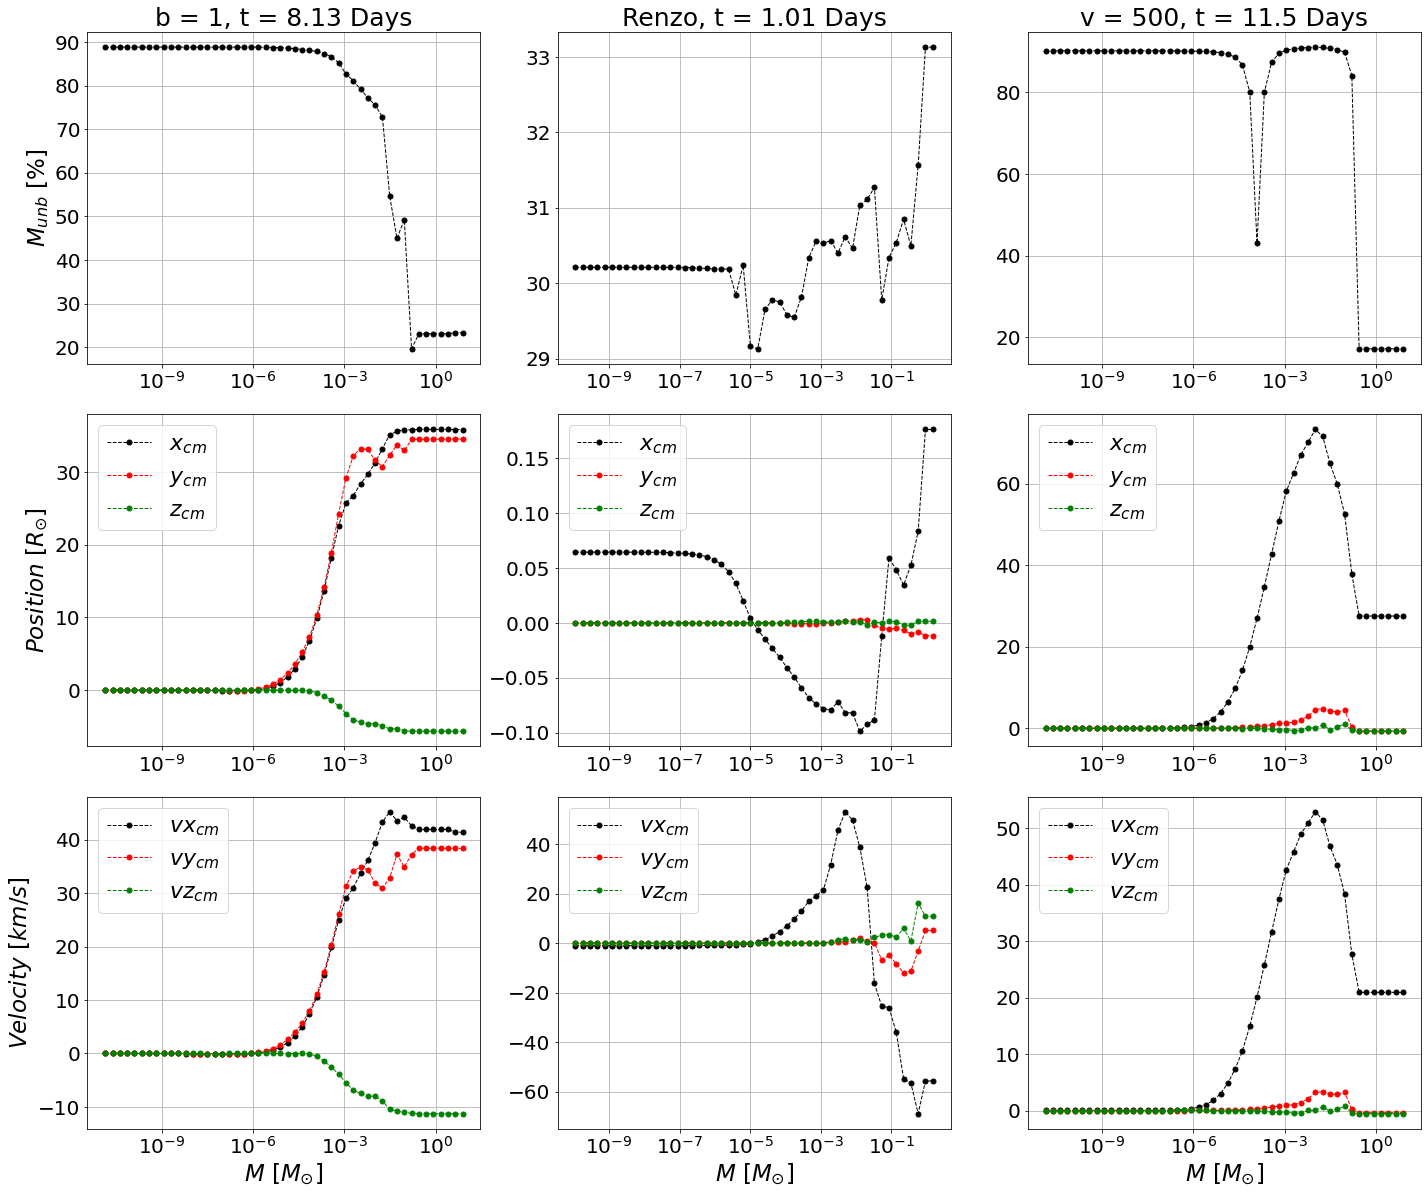

In [13]:
fig, axs=plt.subplots(nrows=3,  ncols=3, figsize=(20,17))
fig.subplots_adjust(hspace=0.3)

axs[0,0].set_title(r'b = 1, t = {} Days'.format(round(tb1,2)), fontsize=25)
axs[0,0].plot(mass_lims,percent,'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5)
axs[0,0].set_ylabel(r'$M_{unb}$ [$\%$]', fontsize = 23)
axs[0,0].semilogx()
axs[0,0].grid()

axs[0,1].set_title(r'Renzo, t = {} Days'.format(round(tr,2)), fontsize=25)
axs[0,1].plot(mass_limsR,percentR,'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5)
axs[0,1].semilogx()
axs[0,1].grid()

axs[0,2].set_title(r'v = 500, t = {} Days'.format(round(tv5,2)), fontsize=25)
axs[0,2].plot(mass_lims5,percent5,'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5)
axs[0,2].semilogx()
axs[0,2].grid()

axs[1,0].plot(mass_lims,pos_cm[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$x_{cm}$')
axs[1,0].plot(mass_lims,pos_cm[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$y_{cm}$')
axs[1,0].plot(mass_lims,pos_cm[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$z_{cm}$')
axs[1,0].set_ylabel(r'$Position$ [$R_{\odot}$]', fontsize = 23)
axs[1,0].semilogx()
axs[1,0].legend(fontsize = 22, loc=0)
axs[1,0].grid()

axs[1,1].plot(mass_limsR,pos_cmR[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$x_{cm}$')
axs[1,1].plot(mass_limsR,pos_cmR[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$y_{cm}$')
axs[1,1].plot(mass_limsR,pos_cmR[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$z_{cm}$')
axs[1,1].semilogx()
axs[1,1].legend(fontsize = 22, loc=0)
axs[1,1].grid()

axs[1,2].plot(mass_lims5,pos_cm5[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$x_{cm}$')
axs[1,2].plot(mass_lims5,pos_cm5[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$y_{cm}$')
axs[1,2].plot(mass_lims5,pos_cm5[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$z_{cm}$')
axs[1,2].semilogx()
axs[1,2].legend(fontsize = 22, loc=0)
axs[1,2].grid()

axs[2,0].plot(mass_lims,vel_cm[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vx_{cm}$')
axs[2,0].plot(mass_lims,vel_cm[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vy_{cm}$')
axs[2,0].plot(mass_lims,vel_cm[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vz_{cm}$')
axs[2,0].set_ylabel(r'$Velocity$ [$km/s$]', fontsize = 23)
axs[2,0].set_xlabel(r'$M$ [$M_{\odot}$]', fontsize = 23)
axs[2,0].semilogx()
axs[2,0].legend(fontsize = 22, loc=0)
axs[2,0].grid()

axs[2,1].plot(mass_limsR,vel_cmR[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vx_{cm}$')
axs[2,1].plot(mass_limsR,vel_cmR[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vy_{cm}$')
axs[2,1].plot(mass_limsR,vel_cmR[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vz_{cm}$')
axs[2,1].set_xlabel(r'$M$ [$M_{\odot}$]', fontsize = 23)
axs[2,1].semilogx()
axs[2,1].legend(fontsize = 22, loc=0)
axs[2,1].grid()

axs[2,2].plot(mass_lims5,vel_cm5[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vx_{cm}$')
axs[2,2].plot(mass_lims5,vel_cm5[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vy_{cm}$')
axs[2,2].plot(mass_lims5,vel_cm5[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vz_{cm}$')
axs[2,2].set_xlabel(r'$M$ [$M_{\odot}$]', fontsize = 23)
axs[2,2].semilogx()
axs[2,2].legend(fontsize = 22, loc=0)
axs[2,2].grid()

fig.tight_layout()
plt.show()

As can be seen in this upper graph, the unbound mass is heavily affected by the threshold of mass used to compute the center. With a low value, meaning that we use a lot of particles to do the computation of the center, the percentage of the unbound mass for *b = 1* and *v = 500* is $\sim 90$ % on the last snapshot of their simulations, this fact does not have a sense at all. On the other hand, when we increase the mass threshold *b = 1* and *v = 500* behaves normally, but the values of the *Renzo* simulation start to fluctuate. Based on this analysis we figure out that the mass of the particles is not a good criterion in order to set the definition of the center.

### 3) % of the denser particles as the center of the remnant:

Finally, there is a third possibility, instead of using the mass we can use the density of the particles as the criterion because this property encodes more precisely the information of the center of stars for the case of sph simulations. For that reason, we perform an exploration along all the ranges of densities to see the behavior of the unbound percentage.

In [14]:
def Dens_exploration(x,y,z,vx,vy,vz,m,d,u):
    
    dens_lims = np.logspace(np.log10(np.amin(d)),np.log10(np.amax(d)),50)
    
    xcm = []
    vxcm = []
    
    ycm = []
    vycm = []
    
    zcm = []
    vzcm = []
    
    Mencl = []
    Rt = []
    
    Mencl_un = []
    R_un = []
    
    percent = []

    for i in range(len(dens_lims)):
        
        ind = np.where(d >= dens_lims[i])[0]
        ms = np.sum(m[ind])

        xc = np.sum(x[ind]*m[ind]) / ms
        yc = np.sum(y[ind]*m[ind]) / ms
        zc = np.sum(z[ind]*m[ind]) / ms
    
        vxc = (np.sum(vx[ind]*m[ind]) / ms)
        vyc = (np.sum(vy[ind]*m[ind]) / ms)
        vzc = (np.sum(vz[ind]*m[ind]) / ms)

        xcm.append(xc)
        ycm.append(yc)
        zcm.append(zc)

        vxcm.append(vxc*(units.R_sun.to(units.km))/(1.8845e-2*86400))
        vycm.append(vyc*(units.R_sun.to(units.km))/(1.8845e-2*86400))
        vzcm.append(vzc*(units.R_sun.to(units.km))/(1.8845e-2*86400))
    
        # Calculate the radius and velocity wrt the cm.
        r = np.sqrt((x-xc)**2 + (y-yc)**2 + (z-zc)**2)
        v = np.sqrt((vx-vxc)**2 + (vy-vyc)**2 + (vz-vzc)**2)

        # Index sorting the radius from lower to higher.
        ind_r = np.argsort(r)

        # Reordering of all quantities based on Radius.

        X = x[ind_r]
        Y = y[ind_r]
        Z = z[ind_r]

        VX = vx[ind_r]
        VY = vy[ind_r]
        VZ = vz[ind_r]

        R = r[ind_r]
        V = v[ind_r]

        U = u[ind_r]
        M = m[ind_r]

        # Generation of the enclosed mass profile.
        Me = np.cumsum(M)
    
        Mencl.append(Me)
        Rt.append(R)

        # Energy calculation for the unbound mass criteria.

        E = V**2 + U - G*Me/R
        unb = np.where(E > 0)[0]

        Munb = M[unb]
        per = np.sum(Munb)*100/np.sum(M)
    
        percent.append(per)

        Me_un = np.cumsum(Munb)
        Run = R[unb]
    
        Mencl_un.append(Me_un)
        R_un.append(Run)
    
    pos_cm = np.array([xcm,ycm,zcm])
    vel_cm = np.array([vxcm,vycm,vzcm])
    
    return dens_lims, pos_cm, vel_cm, percent, Rt, Mencl, R_un, Mencl_un

In [15]:
d_lim, pos_cmd, vel_cmd, perd, Rtd, Mencld, R_und, Mencl_und = Dens_exploration(x,y,z,vx,vy,vz,m,d,u)
d_limR, pos_cmdR, vel_cmdR, perdR, RtdR, MencldR, R_undR, Mencl_undR = Dens_exploration(xR,yR,zR,vxR,vyR,vzR,mR,dR,uR)
d_lim5, pos_cmd5, vel_cmd5, perd5, Rtd5, Mencld5, R_und5, Mencl_und5 = Dens_exploration(x5,y5,z5,vx5,vy5,vz5,m5,d5,u5)

/tmp/ipykernel_7921/500074793.py:74: RuntimeWarning: divide by zero encountered in true_divide
  E = V**2 + U - G*Me/R
/tmp/ipykernel_7921/500074793.py:27: RuntimeWarning: invalid value encountered in double_scalars
  xc = np.sum(x[ind]*m[ind]) / ms
/tmp/ipykernel_7921/500074793.py:28: RuntimeWarning: invalid value encountered in double_scalars
  yc = np.sum(y[ind]*m[ind]) / ms
/tmp/ipykernel_7921/500074793.py:29: RuntimeWarning: invalid value encountered in double_scalars
  zc = np.sum(z[ind]*m[ind]) / ms
/tmp/ipykernel_7921/500074793.py:31: RuntimeWarning: invalid value encountered in double_scalars
  vxc = (np.sum(vx[ind]*m[ind]) / ms)
/tmp/ipykernel_7921/500074793.py:32: RuntimeWarning: invalid value encountered in double_scalars
  vyc = (np.sum(vy[ind]*m[ind]) / ms)
/tmp/ipykernel_7921/500074793.py:33: RuntimeWarning: invalid value encountered in double_scalars
  vzc = (np.sum(vz[ind]*m[ind]) / ms)


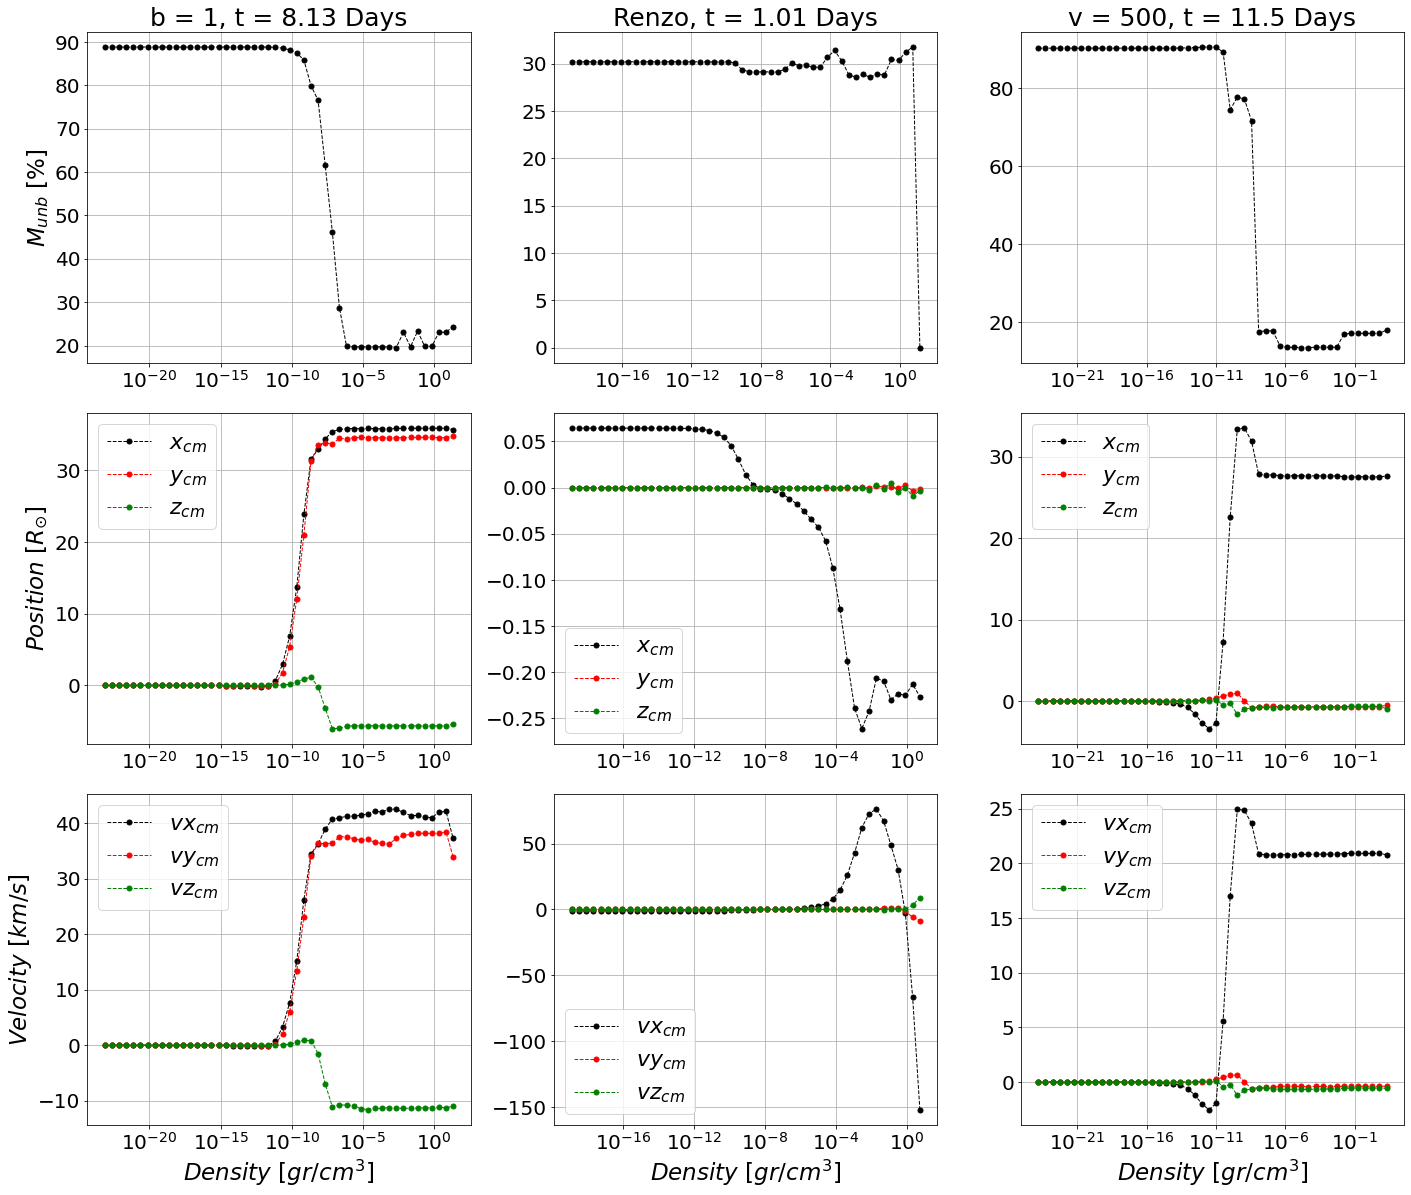

In [16]:
fig, axs=plt.subplots(nrows=3,  ncols=3, figsize=(20,17))
fig.subplots_adjust(hspace=0.3)

axs[0,0].set_title(r'b = 1, t = {} Days'.format(round(tb1,2)), fontsize=25)
axs[0,0].plot(d_lim,perd,'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5)
axs[0,0].set_ylabel(r'$M_{unb}$ [$\%$]', fontsize = 23)
axs[0,0].semilogx()
axs[0,0].grid()

axs[0,1].set_title(r'Renzo, t = {} Days'.format(round(tr,2)), fontsize=25)
axs[0,1].plot(d_limR,perdR,'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5)
axs[0,1].semilogx()
axs[0,1].grid()

axs[0,2].set_title(r'v = 500, t = {} Days'.format(round(tv5,2)), fontsize=25)
axs[0,2].plot(d_lim5,perd5,'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5)
axs[0,2].semilogx()
axs[0,2].grid()

axs[1,0].plot(d_lim,pos_cmd[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$x_{cm}$')
axs[1,0].plot(d_lim,pos_cmd[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$y_{cm}$')
axs[1,0].plot(d_lim,pos_cmd[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$z_{cm}$')
axs[1,0].set_ylabel(r'$Position$ [$R_{\odot}$]', fontsize = 23)
axs[1,0].semilogx()
axs[1,0].legend(fontsize = 22, loc=0)
axs[1,0].grid()

axs[1,1].plot(d_limR,pos_cmdR[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$x_{cm}$')
axs[1,1].plot(d_limR,pos_cmdR[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$y_{cm}$')
axs[1,1].plot(d_limR,pos_cmdR[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$z_{cm}$')
axs[1,1].semilogx()
axs[1,1].legend(fontsize = 22, loc=0)
axs[1,1].grid()

axs[1,2].plot(d_lim5,pos_cmd5[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$x_{cm}$')
axs[1,2].plot(d_lim5,pos_cmd5[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$y_{cm}$')
axs[1,2].plot(d_lim5,pos_cmd5[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$z_{cm}$')
axs[1,2].semilogx()
axs[1,2].legend(fontsize = 22, loc=0)
axs[1,2].grid()

axs[2,0].plot(d_lim,vel_cmd[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vx_{cm}$')
axs[2,0].plot(d_lim,vel_cmd[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vy_{cm}$')
axs[2,0].plot(d_lim,vel_cmd[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vz_{cm}$')
axs[2,0].set_ylabel(r'$Velocity$ [$km/s$]', fontsize = 23)
axs[2,0].set_xlabel(r'$Density$ [$gr/cm^{3}$]', fontsize = 23)
axs[2,0].semilogx()
axs[2,0].legend(fontsize = 22, loc=0)
axs[2,0].grid()

axs[2,1].plot(d_limR,vel_cmdR[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vx_{cm}$')
axs[2,1].plot(d_limR,vel_cmdR[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vy_{cm}$')
axs[2,1].plot(d_limR,vel_cmdR[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vz_{cm}$')
axs[2,1].set_xlabel(r'$Density$ [$gr/cm^{3}$]', fontsize = 23)
axs[2,1].semilogx()
axs[2,1].legend(fontsize = 22, loc=0)
axs[2,1].grid()

axs[2,2].plot(d_lim5,vel_cmd5[0],'k',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vx_{cm}$')
axs[2,2].plot(d_lim5,vel_cmd5[1],'r',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vy_{cm}$')
axs[2,2].plot(d_lim5,vel_cmd5[2],'g',
              marker='o', linestyle='dashed', linewidth=1, markersize=5,label=r'$vz_{cm}$')
axs[2,2].set_xlabel(r'$Density$ [$gr/cm^{3}$]', fontsize = 23)
axs[2,2].semilogx()
axs[2,2].legend(fontsize = 22, loc=0)
axs[2,2].grid()

fig.tight_layout()
plt.show()

This graph shows explicitly how the unbound percentage is more stable under the variation of the density threshold once there is achieved a sufficiently high value. For this reason, the densest particle was established as the criteria to track the center of the remnant along all the snapshots in the final implementation for all the .py modules.

### 4) Central unbound particles problem:

Despite having concluded that the density as a parameter for the determination of the center of the remnant fulfills the necessary conditions, when visualizing the enclosed mass profiles for the unbounded particles each of the criteria exhibited a serious problem. In each snapshot, central particles of the remnant were classified as unbounded, and in some cases (*Renzo*) these central particles accounted for the majority of the mass loss after the collision.

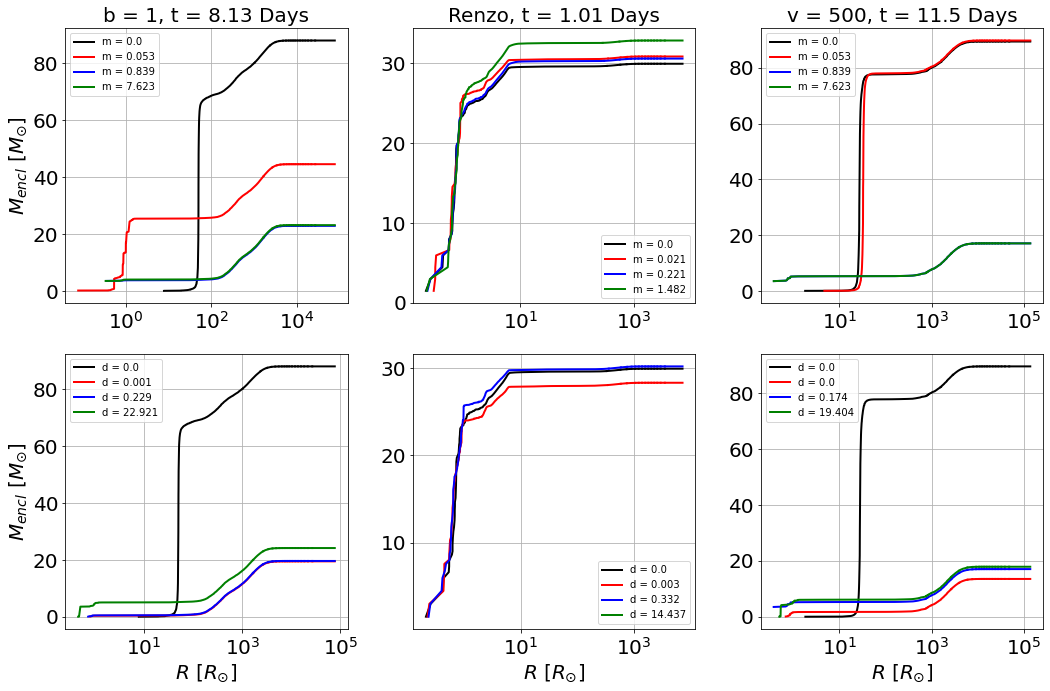

In [17]:
fig, axs=plt.subplots(nrows=2,  ncols=3, figsize=(15,10))
fig.subplots_adjust(hspace=0.3)

axs[0,0].set_title(r'b = 1, t = {} Days'.format(round(tb1,2)), fontsize=20)
axs[0,0].plot(R_un[20],Mencl_un[20],'-k', linewidth=2,
              label='m = {}'.format(round(mass_lims[20],3)))
axs[0,0].plot(R_un[40],Mencl_un[40],'-r', linewidth=2
              ,label='m = {}'.format(round(mass_lims[40],3)))
axs[0,0].plot(R_un[45],Mencl_un[45],'-b', linewidth=2
              ,label='m = {}'.format(round(mass_lims[45],3)))
axs[0,0].plot(R_un[49],Mencl_un[49],'-g', linewidth=2
              ,label='m = {}'.format(round(mass_lims[49],3)))
axs[0,0].set_ylabel(r'$M_{encl}$ [$M_{\odot}$]', fontsize = 20)
axs[0,0].legend(fontsize = 10, loc=0)
axs[0,0].semilogx()
axs[0,0].grid()

axs[0,1].set_title(r'Renzo, t = {} Days'.format(round(tr,2)), fontsize=20)
axs[0,1].plot(R_unR[20],Mencl_unR[20],'-k', linewidth=2
              ,label='m = {}'.format(round(mass_limsR[20],3)))
axs[0,1].plot(R_unR[40],Mencl_unR[40],'-r', linewidth=2
              ,label='m = {}'.format(round(mass_limsR[40],3)))
axs[0,1].plot(R_unR[45],Mencl_unR[45],'-b', linewidth=2
              ,label='m = {}'.format(round(mass_limsR[45],3)))
axs[0,1].plot(R_unR[49],Mencl_unR[49],'-g', linewidth=2
              ,label='m = {}'.format(round(mass_limsR[49],3)))
axs[0,1].semilogx()
axs[0,1].legend(fontsize = 10, loc=0)
axs[0,1].grid()

axs[0,2].set_title(r'v = 500, t = {} Days'.format(round(tv5,2)), fontsize=20)
axs[0,2].plot(R_un5[20],Mencl_un5[20],'-k', linewidth=2
              ,label='m = {}'.format(round(mass_lims5[20],3)))
axs[0,2].plot(R_un5[40],Mencl_un5[40],'-r', linewidth=2
              ,label='m = {}'.format(round(mass_lims5[40],3)))
axs[0,2].plot(R_un5[45],Mencl_un5[45],'-b', linewidth=2
              ,label='m = {}'.format(round(mass_lims5[45],3)))
axs[0,2].plot(R_un5[49],Mencl_un5[49],'-g', linewidth=2
              ,label='m = {}'.format(round(mass_lims5[49],3)))
axs[0,2].semilogx()
axs[0,2].legend(fontsize = 10, loc=0)
axs[0,2].grid()

axs[1,0].plot(R_und[20],Mencl_und[20],'-k', linewidth=2
              ,label='d = {}'.format(round(d_lim[20],3)))
axs[1,0].plot(R_und[40],Mencl_und[40],'-r', linewidth=2
              ,label='d = {}'.format(round(d_lim[40],3)))
axs[1,0].plot(R_und[45],Mencl_und[45],'-b', linewidth=2
              ,label='d = {}'.format(round(d_lim[45],3)))
axs[1,0].plot(R_und[49],Mencl_und[49],'-g', linewidth=2
              ,label='d = {}'.format(round(d_lim[49],3)))
axs[1,0].set_ylabel(r'$M_{encl}$ [$M_{\odot}$]', fontsize = 20)
axs[1,0].set_xlabel(r'$R$ [$R_{\odot}$]', fontsize = 20)
axs[1,0].semilogx()
axs[1,0].legend(fontsize = 10, loc=0)
axs[1,0].grid()

axs[1,1].plot(R_undR[20],Mencl_undR[20],'-k', linewidth=2
              ,label='d = {}'.format(round(d_limR[20],3)))
axs[1,1].plot(R_undR[40],Mencl_undR[40],'-r', linewidth=2
              ,label='d = {}'.format(round(d_limR[40],3)))
axs[1,1].plot(R_undR[45],Mencl_undR[45],'-b', linewidth=2
              ,label='d = {}'.format(round(d_limR[45],3)))
axs[1,1].plot(R_undR[49],Mencl_undR[49],'-g', linewidth=2
              ,label='d = {}'.format(round(d_limR[49],3)))
axs[1,1].semilogx()
axs[1,1].set_xlabel(r'$R$ [$R_{\odot}$]', fontsize = 20)
axs[1,1].legend(fontsize = 10, loc=0)
axs[1,1].grid()

axs[1,2].plot(R_und5[20],Mencl_und5[20],'-k', linewidth=2
              ,label='d = {}'.format(round(d_lim5[20],3)))
axs[1,2].plot(R_und5[40],Mencl_und5[40],'-r', linewidth=2
              ,label='d = {}'.format(round(d_lim5[40],3)))
axs[1,2].plot(R_und5[45],Mencl_und5[45],'-b', linewidth=2
              ,label='d = {}'.format(round(d_lim5[45],3)))
axs[1,2].plot(R_und5[49],Mencl_und5[49],'-g', linewidth=2
              ,label='d = {}'.format(round(d_lim5[49],3)))
axs[1,2].semilogx()
axs[1,2].set_xlabel(r'$R$ [$R_{\odot}$]', fontsize = 20)
axs[1,2].legend(fontsize = 10, loc=0)
axs[1,2].grid()

fig.tight_layout()
plt.show()

In this plot, we can see that once the minimum value, both mass and density, is reached, the mass profiles undergo a transformation that leads them to classify central particles ($0\leq R\leq10$ $[R_{\odot}]$) as unbounded (for the case of *b = 1* and *v = 500*). In the case of *Renzo*, all values present such a problem and the shape of the profile does not undergo substantial changes. This led us to think that this problem was not related to the criterion for the determination of the center, but one of the steps for the classification of bound-unbound particles.

The key factor in this calculation is the total specific energy associated with each particle. So by inspecting each of the factors present in the equation we were able to glimpse the source of this problem: the approximation made to the specific potential energy of each particle ($\frac{GM_{enc}}{R}$). To greatly reduce the calculation time, the potential energy was approximated as a homogeneous, spherical distribution of mass to which each particle is subjected. This approximation fails in the central region of our simulated stars since none of the conditions are fully satisfied, so we decided to make a comparison for some central particles of the *Renzo* simulation between their actual potential energy, calculated particle by particle, and the value predicted by the approximation.


In [18]:
# Calculate the position and velocity wrt the center of mass.

nw_x, nw_y, nw_z, nw_vx, nw_vy, nw_vz = Men.re_center(xR,yR,zR,vxR,vyR,vzR,dR)

# Reordering of all quantities based on Radius sorting from lower to higher.

X, Y, Z, VX, VY, VZ, R, V, M, U = Men.re_order(nw_x,nw_y,nw_z,nw_vx,nw_vy,nw_vz,mR,uR)

# Generation of the enclosed mass profile and total mass.

Mt, M_enc = Men.mass_quantities(M)

# Energy calculation for the unbound mass definition.

e = Men.energy(V,U,R,M_enc)

# Aplication of bound-unbound criteria.

bn, un = Men.bound_unbound(R,e)

/home/juanmanuel/Documents/Master/Semester2/Computational/Stars_Collisions/./Python/Menc_Munb.py:161: RuntimeWarning: divide by zero encountered in true_divide
  e = v**2 + u - G*m_enc*(1/r)


In [19]:
# This is the file where the values for the real potential energy of the first
# 10 particles for the 0110 snapshot of the Renzo simulation were stored. This
# file was built after two days of computation using the function below.

K = np.genfromtxt('Data/Renzo/Potential_out0110.txt')

#K = []
#for i in range(len(M)):
    #suma = 0
    #for j in range(len(M)):
        #if i != j:
            #suma += G*(M[i]*M[j])/np.linalg.norm(np.array([X,Y,Z])[:,i]-np.array([X,Y,Z])[:,j]) 
        #else:
            #pass
    #K.append(suma)

In [20]:
# This is the "corrected" versión of the total specific energy, using the rigth potential.

e_c = V[0:10]**2 + U[0:10] - K 

/tmp/ipykernel_7921/531540036.py:12: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(R[1:10],(G*M_enc/R)[1:10], color='orange', marker='o', linestyle='dashed',


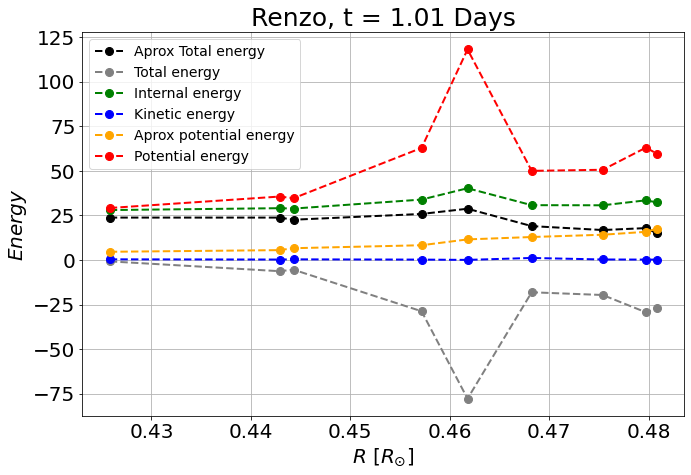

In [21]:
fig = plt.figure(figsize=(10, 7))

plt.title(r'Renzo, t = {} Days'.format(round(tr,2)), fontsize=25)
plt.plot(R[1:10],e[1:10], color='black', marker='o', linestyle='dashed',
         linewidth=2, markersize=8, label='Aprox Total energy')
plt.plot(R[1:10],e_c[1:10], color='gray', marker='o', linestyle='dashed',
         linewidth=2, markersize=8, label='Total energy')
plt.plot(R[1:10],U[1:10], color='green', marker='o', linestyle='dashed',
         linewidth=2, markersize=8, label='Internal energy')
plt.plot(R[1:10],(V**2)[1:10], color='blue', marker='o', linestyle='dashed',
         linewidth=2, markersize=8, label='Kinetic energy')
plt.plot(R[1:10],(G*M_enc/R)[1:10], color='orange', marker='o', linestyle='dashed',
         linewidth=2, markersize=8, label='Aprox potential energy')
plt.plot(R[1:10],K[1:10], color='red', marker='o', linestyle='dashed',
         linewidth=2, markersize=8, label='Potential energy')

plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$Energy$")
plt.legend(fontsize = 14, loc=0)
plt.grid()

plt.tight_layout()
plt.show()

Comparing the values generated from the correct calculation of the potential energy we identified that this was indeed the source of the problem. Using the approximation for the potential energy (orange line) we can identify that its values are lower than those present in the internal energy of the central particles (green line), from which a high temperature is expected. Since the kinetic energy (blue line) does not play a major role in this region of the remnant, as expected, this difference between $U$ and $K$ forces the central particles to have a positive approximate total energy for this region (black line). However, when we include the correctly calculated potential energy (red line) this situation changes dramatically and gives the central particles a negative total energy (grey line) in agreement with expectations.

This problem is complex since calculating the actual potential energy of each particle in each snapshot is computationally very expensive. Therefore, the solution used was to assume that in all the cases analyzed in this project, particles with a radius $R \leq 1.5$ [$R_{\odot}$] will automatically be classified as bounded, and the approximate formula for the calculation of the specific potential energy will continue to be used. This criterion was duly included in the *bound_unbound* function of the **Menc_Munb.py** module.

### 4) Final results:

Finally, knowing that the particle with the highest density would be the center of the remnant of each collision and taking the necessary precautions with the bound-unbound selection criterion, all snapshots were analyzed and the percentage of unbounded mass could be stored for each step in the time evolution of the collisions. This and the generation and storage of all the enclosed mass profiles allowed interesting insights into each sph simulation.

In [22]:
pr, ot = np.genfromtxt('Data/4Myr/Munb_percent.txt', usecols= (0,1), unpack=True)
prR, otR = np.genfromtxt('Data/Renzo/Munb_percent.txt', usecols= (0,1), unpack=True)
prb, otb = np.genfromtxt('Data/b0.1/Munb_percent.txt', usecols= (0,1), unpack=True)
prb1, otb1 = np.genfromtxt('Data/b1/Munb_percent.txt', usecols= (0,1), unpack=True)
prv1, otv1 = np.genfromtxt('Data/v100/Munb_percent.txt', usecols= (0,1), unpack=True)
prv5, otv5 = np.genfromtxt('Data/v500/Munb_percent.txt', usecols= (0,1), unpack=True)

In [23]:
tm = np.linspace(0,0.5*1.8445e-02*len(pr),len(pr))
tmR = np.linspace(0,0.5*1.8445e-02*len(prR),len(prR))
tmb = np.linspace(0,0.5*1.8445e-02*len(prb),len(prb))
tmb1 = np.linspace(0,0.5*1.8445e-02*len(prb1),len(prb1))
tmv1 = np.linspace(0,0.5*1.8445e-02*len(prv1),len(prv1))
tmv5 = np.linspace(0,0.5*1.8445e-02*len(prv5),len(prv5))

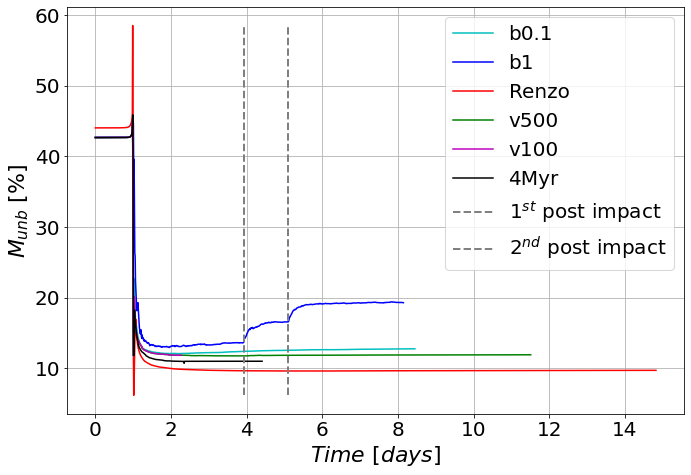

In [24]:
fig = plt.figure(figsize=(10, 7))

plt.plot(tmb,prb,'-c', label = 'b0.1')
plt.plot(tmb1,prb1,'-b', label = 'b1')
plt.plot(tmR,prR,'-r', label = 'Renzo')
plt.plot(tmv5[:-1],prv5[:-1],'-g', label = 'v500')
plt.plot(tmv1[:-1],prv1[:-1],'-m', label = 'v100')
plt.plot(tm,pr,'-k', label = '4Myr')

plt.vlines(tmb1[426], np.min(prR), np.max(prR), colors='gray', linestyles='dashed',
           linewidth=2, label=r'$1^{st}$ post impact')
plt.vlines(tmb1[552], np.min(prR), np.max(prR), colors='gray', linestyles='dashed',
           linewidth=2, label=r'$2^{nd}$ post impact')


plt.xlabel("$Time$ $[days]$", fontsize = 22)
plt.ylabel("$M_{unb}$ $[\%]$", fontsize = 22)
plt.grid()
plt.legend(fontsize = 20, loc=0)

plt.tight_layout()
plt.show()

The evolution of the unbound mass percentage under these criteria is shown to be much smoother and well-behaved compared to the case where we use the most massive particle as the center. We can see in this plot that all simulations fall within the same range of mass loss after the collision and the *Renzo* values are as expected. For all simulations with an impact parameter $ b = 0$, this criterion allows us to determine that just one day after the impact there is not much further evolution of the mass profiles and therefore the model can be considered sufficiently relaxed after the collision. However, for the simulations where the impact parameter $b \neq 0$ we can see that the percentage of unbound mass gradually increases over time and even subsequent collisions generate a much larger change in these cases (see the blue line for the case $b=1$ and the video **b1.mp4** store in the *Data* folder of this repository). This seems to indicate that the largest mass loss under these conditions is for vertically separated stars and not for the case of a direct collision as argued in *(Ballone, 2022)*.

The impact parameter is thus the key factor determining the amount of mass lost a posteriori, while the impact velocity or the evolution time of the stars does not seem to play a major role in these cases. For collisions of stars with $b \neq 0$, it is necessary to explore another indicator to determine precisely when the model can be considered sufficiently relaxed after the collision. Finally, as can be seen in the graph below, the mass profiles behave as expected throughout the evolution of the collisions.

In [25]:
T0 = np.genfromtxt('{}b1/Data/Total_out0000.txt'.format(data_path), delimiter='\t')
U0 = np.genfromtxt('{}b1/Data/Unb_out0000.txt'.format(data_path), delimiter='\t')
B0 = np.genfromtxt('{}b1/Data/Bun_out0000.txt'.format(data_path), delimiter='\t')

T1 = np.genfromtxt('{}b1/Data/Total_out0105.txt'.format(data_path), delimiter='\t')
U1 = np.genfromtxt('{}b1/Data/Unb_out0105.txt'.format(data_path), delimiter='\t')
B1 = np.genfromtxt('{}b1/Data/Bun_out0105.txt'.format(data_path), delimiter='\t')

T8 = np.genfromtxt('{}b1/Data/Total_out0882.txt'.format(data_path), delimiter='\t')
U8 = np.genfromtxt('{}b1/Data/Unb_out0882.txt'.format(data_path), delimiter='\t')
B8 = np.genfromtxt('{}b1/Data/Bun_out0882.txt'.format(data_path), delimiter='\t')

In [26]:
Rb1T_0, Mb1T_0 = T0[0], T0[1]
Rb1U_0, Mb1U_0 = U0[0], U0[1]
Rb1B_0, Mb1B_0 = B0[0], B0[1]

Rb1T_1, Mb1T_1 = T1[0], T1[1]
Rb1U_1, Mb1U_1 = U1[0], U1[1]
Rb1B_1, Mb1B_1 = B1[0], B1[1]

Rb1T_8, Mb1T_8 = T8[0], T8[1]
Rb1U_8, Mb1U_8 = U8[0], U8[1]
Rb1B_8, Mb1B_8 = B8[0], B8[1]

In [27]:
t0 = 0.0
t105 = 0.5*1.8445e-02*105
t882 = 0.5*1.8445e-02*882 

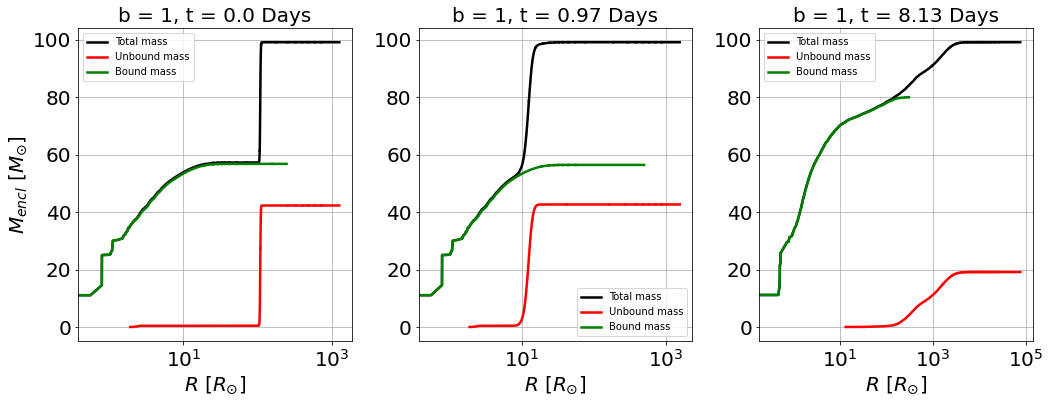

In [28]:
fig, axs=plt.subplots(nrows=1,  ncols=3, figsize=(15,6))
fig.subplots_adjust(hspace=0.3)

axs[0].set_title(r'b = 1, t = {} Days'.format(round(t0,2)), fontsize=20)
axs[0].plot(Rb1T_0,Mb1T_0,'-k', linewidth=2.5, label='Total mass')
axs[0].plot(Rb1U_0,Mb1U_0,'-r', linewidth=2.5, label='Unbound mass')
axs[0].plot(Rb1B_0,Mb1B_0,'-g', linewidth=2.5, label='Bound mass')
axs[0].set_ylabel(r'$M_{encl}$ [$M_{\odot}$]', fontsize = 20)
axs[0].set_xlabel(r'$R$ [$R_{\odot}$]', fontsize = 20)
axs[0].legend(fontsize = 10, loc=0)
axs[0].semilogx()
axs[0].grid()

axs[1].set_title(r'b = 1, t = {} Days'.format(round(t105,2)), fontsize=20)
axs[1].plot(Rb1T_1,Mb1T_1,'-k', linewidth=2.5, label='Total mass')
axs[1].plot(Rb1U_1,Mb1U_1,'-r', linewidth=2.5, label='Unbound mass')
axs[1].plot(Rb1B_1,Mb1B_1,'-g', linewidth=2.5, label='Bound mass')
axs[1].semilogx()
axs[1].set_xlabel(r'$R$ [$R_{\odot}$]', fontsize = 20)
axs[1].legend(fontsize = 10, loc=0)
axs[1].grid()

axs[2].set_title(r'b = 1, t = {} Days'.format(round(t882,2)), fontsize=20)
axs[2].plot(Rb1T_8,Mb1T_8,'-k', linewidth=2.5, label='Total mass')
axs[2].plot(Rb1U_8,Mb1U_8,'-r', linewidth=2.5, label='Unbound mass')
axs[2].plot(Rb1B_8,Mb1B_8,'-g', linewidth=2.5, label='Bound mass')
axs[2].semilogx()
axs[2].legend(fontsize = 10, loc=0)
axs[2].set_xlabel(r'$R$ [$R_{\odot}$]', fontsize = 20)
axs[2].grid()

fig.tight_layout()
plt.show()